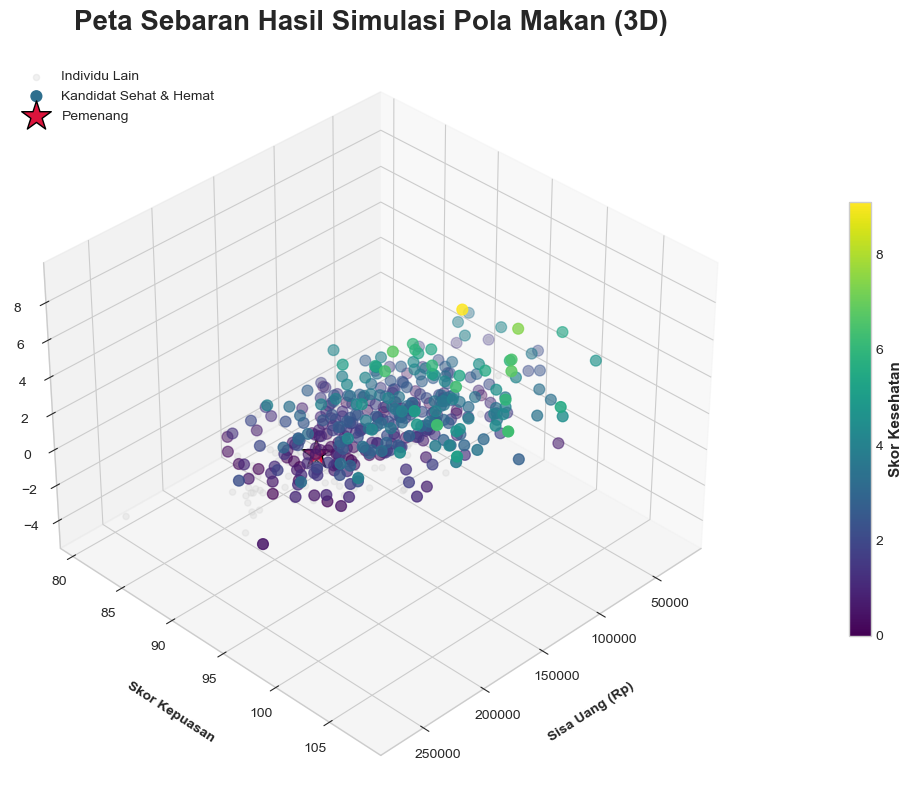


--- HASIL ANALISIS TUGAS ---
TUGAS (1): Pola makan mana saja yang sehat
Ditemukan 387 pola makan yang sehat.
Daftar ID (pola makan) individu: 
[  0   2   3   6   7   8  10  11  13  14  15  17  18  20  21  22  24  25
  26  27  28  29  30  35  37  38  39  40  41  42  44  46  47  48  50  51
  52  54  55  56  57  59  60  61  62  64  65  66  67  68  69  71  72  74
  76  78  79  80  81  82  84  85  86  87  90  91  92  93  94  95  96  98
  99 100 101 102 104 105 106 107 109 110 111 112 113 114 115 116 117 118
 120 121 124 126 127 129 130 131 132 133 134 135 138 139 140 141 142 143
 144 145 146 147 148 150 152 153 154 155 157 158 160 161 162 163 164 165
 166 167 168 169 170 173 174 176 177 178 180 181 182 183 185 186 187 189
 190 191 192 193 194 195 196 198 200 201 202 203 204 206 209 211 212 213
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 235 236 237 239 240 241 242 243 244 245 246 247 249 250 251 252 255
 256 257 259 260 261 262 263 264 266 267 268 269 270 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

pd.set_option('display.max_rows', None)
# ===============
# KODE PROGRAM
# ===============

makan = pd.read_csv("makanan.csv") 

# Inisialisasi 
NPM= 19102
np.random.seed(NPM)

budget= 1e6 

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihanku= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=int) 
# Tipe data `resp_pilih` diubah dari `np.double` menjadi `int` karena  digunakan untuk menyimpan nomor indeks makanan 

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0
    
    for i in range(0, 31): # hari
        # makan pertama
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] + \
            w_rasa * makan['rasa'][pilihan] + \
            w_sehat * makan['sehat'][pilihan] - \
            w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")   
        resp_pilih[n][2*i]= pilihan # Angka `1` diubah menjadi variabel `i` Agar jadwal makan tercatat untuk setiap hari
        
        # makan kedua
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] + \
            w_rasa * makan['rasa'][pilihan] + \
            w_sehat * makan['sehat'][pilihan] - \
            w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")   
        resp_pilih[n][2*i+1]= pilihan   # Angka `1` diubah menjadi variabel `i` untuk mencatat makan kedua setiap hari
    
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    idx_sisa = int((budget - SISA_MININUM) / 1000)  # Baris ini dibungkus dengan kondisi `if` untuk mencegah eror.
    if 0 <= idx_sisa < len(bin_sisa):
        resp_sehat[n][idx_sisa] = skor_sehat

# ===================
# VISUALISASI HASIL
# ===================

# Menentukan ID pemenang dan kandidat lain untuk disorot di plot
idx_sehat_dan_hemat = np.where((sehat > 0) & (sisa > 0))[0]
id_pemenang = 39 # Sesuai hasil simulasi dengan NPM 19102

# Mengatur gaya plot
style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
# Menampilkan semua 500 individu sebagai latar belakang
ax.scatter(sisa, skor, sehat, c='lightgrey', marker='o', alpha=0.3, label='Individu Lain')
# Menampilkan kandidat "Sehat & Hemat" dan menyimpan hasilnya ke variabel `sc`
sc = ax.scatter(sisa[idx_sehat_dan_hemat], skor[idx_sehat_dan_hemat], sehat[idx_sehat_dan_hemat], 
                c=sehat[idx_sehat_dan_hemat], cmap='viridis', marker='o', s=60, label='Kandidat Sehat & Hemat')
# Menandai sang pemenang
ax.scatter(sisa[id_pemenang], skor[id_pemenang], sehat[id_pemenang], 
            c='crimson', marker='*', s=500, edgecolor='black', zorder=10, label=f'Pemenang')
# Menambahkan judul dan label sumbu
ax.set_title('Peta Sebaran Hasil Simulasi Pola Makan (3D)', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Sisa Uang (Rp)', fontweight='bold', labelpad=15)
ax.set_ylabel('Skor Kepuasan', fontweight='bold', labelpad=15)
ax.set_zlabel('Skor Kesehatan', fontweight='bold', labelpad=15)
# Menampilkan legenda dan color bar
ax.legend(loc='upper left', fontsize=10)
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Skor Kesehatan', fontsize=11, fontweight='bold')
# Mengatur sudut pandang kamera 3D
ax.view_init(elev=35, azim=45)
# Gunakan tight_layout untuk membantu merapikan
plt.tight_layout()
plt.show()

# =============================
# KODE UNTUK MENJAWAB TUGAS
# =============================
print("\n--- HASIL ANALISIS TUGAS ---")

# (1) Cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan positif
idx_sehat = np.where(sehat > 0)[0]
print(f"TUGAS (1): Pola makan mana saja yang sehat")
print(f"Ditemukan {len(idx_sehat)} pola makan yang sehat.")
print(f"Daftar ID (pola makan) individu: \n{idx_sehat}\n")

# (2) Cari titik-titik dengan sisa uang bulanan positif dari (1)
idx_sehat_dan_hemat = np.where((sehat > 0) & (sisa > 0))[0]
print(f"TUGAS (2): Titik mana saja yang memiliki sisa uang positif")
print(f"Dari daftar di atas, ditemukan {len(idx_sehat_dan_hemat)} titik yang juga memiliki sisa uang positif.")
print(f"Daftar ID (titik) individu: \n{idx_sehat_dan_hemat}\n")

# (3) Cari titik dengan skor kumulatif terbesar di antara hasil (2)
print(f"TUGAS (3): Titik dengan skor terbesar")
if len(idx_sehat_dan_hemat) > 0:
    skor_kandidat = skor[idx_sehat_dan_hemat]
    posisi_pemenang_relatif = np.argmax(skor_kandidat)
    id_pemenang = idx_sehat_dan_hemat[posisi_pemenang_relatif]

    print(f"Titik dengan skor kumulatif terbesar ditemukan pada individu ID: {id_pemenang}")
    print(f"  - Skor Kumulatif Tertinggi: {skor[id_pemenang]:.2f}")
    print(f"  - Skor Kesehatan: {sehat[id_pemenang]:.2f}")
    print(f"  - Sisa Uang: Rp {sisa[id_pemenang]:,.2f}\n")

    # (4) Tampilkan jadwal makanan sesuai pilihan (resp_pilih)
    print(f"TUGAS (4): Tampilan Jadwal Makanan (dari 'resp_pilih') untuk ID {id_pemenang}")
    
    jadwal_pemenang = []
    pilihan_pemenang = resp_pilih[id_pemenang]
    
    for hari in range(31):
        makan_pagi_idx = pilihan_pemenang[hari * 2]
        makan_malam_idx = pilihan_pemenang[hari * 2 + 1]
        
        nama_makan_pagi = makan['makanan'].iloc[makan_pagi_idx]
        nama_makan_malam = makan['makanan'].iloc[makan_malam_idx]
        
        jadwal_pemenang.append([f"Hari {hari+1}", nama_makan_pagi, nama_makan_malam])

    df_jadwal = pd.DataFrame(jadwal_pemenang, columns=['Hari', 'Makan Pertama', 'Makan Kedua'])
    print(df_jadwal.to_string())
else:
    print("Tidak ditemukan individu yang memenuhi kriteria untuk tugas (3) dan (4).")